# Report Assignment

In [1]:
# Import relevant libraries
import pandas as pd
import sqlite3

In [2]:
# Connect to Database File
conn = sqlite3.connect("accident_data_v1.0.0_2023.db")
cursor = conn.cursor()

In [3]:
# Step 1: Check available tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [table[0] for table in cursor.fetchall()]
print("Available tables:", tables)

Available tables: ['accident', 'casualty', 'vehicle', 'lsoa']


In [4]:
# Step 2: Extract column names for each table
table_columns = {}

for table in ["accident", "vehicle", "casualty", "lsoa"]:
    cursor.execute(f"PRAGMA table_info({table})")
    columns = [row[1] for row in cursor.fetchall()]
    table_columns[table] = columns
    print("\nColumns in " + table + ":" , columns)


Columns in accident: ['accident_index', 'accident_year', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location']

Columns in vehicle: ['vehicle_index', 'accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'vehicle_type', 'towing_and_articulation', 'vehicle_man

In [5]:
# Step 3: Count the number of rows in each table
for table in ["accident", "vehicle", "casualty", "lsoa"]:
    cursor.execute(f"SELECT COUNT(*) FROM {table}")
    count = cursor.fetchone()[0]
    print("Number of rows in " +table+ ":", count)

Number of rows in accident: 461352
Number of rows in vehicle: 849091
Number of rows in casualty: 600332
Number of rows in lsoa: 34378


In [6]:
# 3. Extract all rows from the 'accident' table where accident_year == 2020
query = """
SELECT *
FROM accident
WHERE accident_year = 2020;
"""
df_acc_2020 = pd.read_sql_query(query, conn)

In [7]:
# 4. Record checks
print("Total records for 2020:", len(df_acc_2020))
df_acc_2020[['accident_index', 'date', 'time', 'accident_severity', 'day_of_week']]

Total records for 2020: 91199


,accident_index,date,time,accident_severity,day_of_week
0,2020010219808,04/02/2020,09:00,3,3
1,2020010220496,27/04/2020,13:55,3,2
2,2020010228005,01/01/2020,01:25,3,4
3,2020010228006,01/01/2020,01:50,2,4
4,2020010228011,01/01/2020,02:25,3,4
...,...,...,...,...,...
91194,2020991027064,12/08/2020,14:30,2,4
91195,2020991029573,13/11/2020,15:05,3,6
91196,2020991030297,15/04/2020,12:42,2,4
91197,2020991030900,15/12/2020,14:00,3,3


In [8]:
# Check for missing values
print(df_acc_2020.isnull().sum())

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [9]:
# Parse directly with pandas
df_acc_2020['time_parsed'] = pd.to_datetime(
    df_acc_2020['time'],
    format='%H:%M',
    errors='coerce'
)
df_acc_2020['hour'] = df_acc_2020['time_parsed'].dt.hour
df_acc_2020['minute'] = df_acc_2020['time_parsed'].dt.minute


In [10]:
df_vehicle_2020 = pd.read_sql_query(
    "SELECT * FROM vehicle WHERE accident_year = 2020;",
    conn
)

# 3. Load casualty data for 2020
df_casualty_2020 = pd.read_sql_query(
    "SELECT * FROM casualty WHERE accident_year = 2020;",
    conn
)

# 5. Quick sanity check
print("Vehicle records:", df_vehicle_2020.shape)
print("Casualty records:", df_casualty_2020.shape)

# 6. Preview the first few rows
df_vehicle_2020.head()

Vehicle records: (167375, 28)
Casualty records: (115584, 19)


,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1


In [11]:
df_casualty_2020.head()

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3


### Task 1

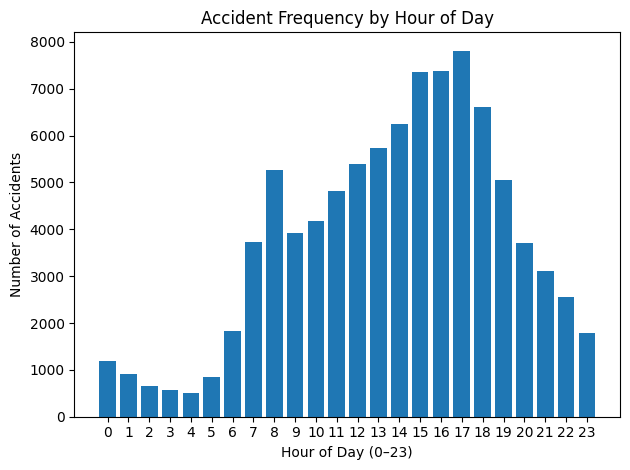

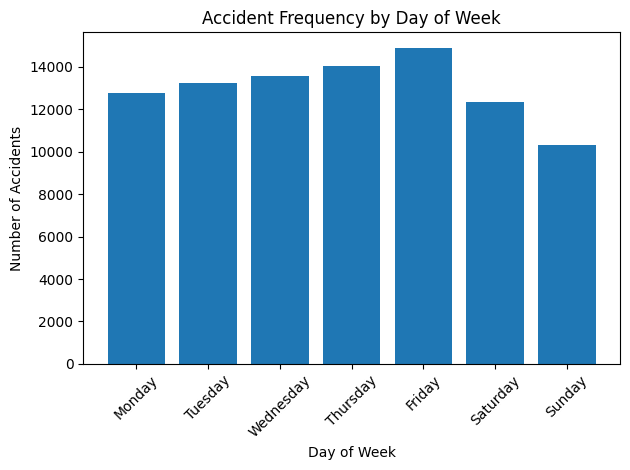

In [12]:
import matplotlib.pyplot as plt

# 1. Accidents by Hour of Day
hourly_counts = df_acc_2020['hour'].value_counts().sort_index()

plt.figure()
plt.bar(hourly_counts.index, hourly_counts.values)
plt.title('Accident Frequency by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# 2. Accidents by Day of Week

# Replace DF with your DataFrame (e.g. df_acc_2020 or df)
DF = df_acc_2020  

# Map integer weekdays to names
dow_map = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}
DF['day_of_week_name'] = DF['day_of_week'].map(dow_map)

# Count in the proper order
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = DF['day_of_week_name'].value_counts().reindex(dow_order)

plt.figure()
plt.bar(dow_counts.index, dow_counts.values)
plt.title('Accident Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 2

In [13]:
# Motorcycle capacity categories
def bike_cat(cc):
    try:
        cc = float(cc)
    except:
        return None
    if cc <= 125:
        return 'Motorcycle ≤125cc'
    elif cc <= 500:
        return 'Motorcycle 126–500cc'
    else:
        return 'Motorcycle >500cc'

df_vehicle_2020['bike_cat'] = df_vehicle_2020['engine_capacity_cc'].apply(bike_cat)
df_bikes = df_vehicle_2020.dropna(subset=['bike_cat'])

In [14]:
# Merge with accident times/days
df_merge = pd.merge(
    df_bikes[['accident_index','bike_cat']],
    df_acc_2020[['accident_index','hour','day_of_week']],
    on='accident_index',
    how='inner'
)

# Map day_of_week ints to names
dow_map = {
    1:'Sunday',2:'Monday',3:'Tuesday',4:'Wednesday',
    5:'Thursday',6:'Friday',7:'Saturday'
}
df_merge['dow_name'] = df_merge['day_of_week'].map(dow_map)

# Drop duplicates to avoid double‐counting multi‐bike accidents
df_merge = df_merge.drop_duplicates(subset=['accident_index','bike_cat'])

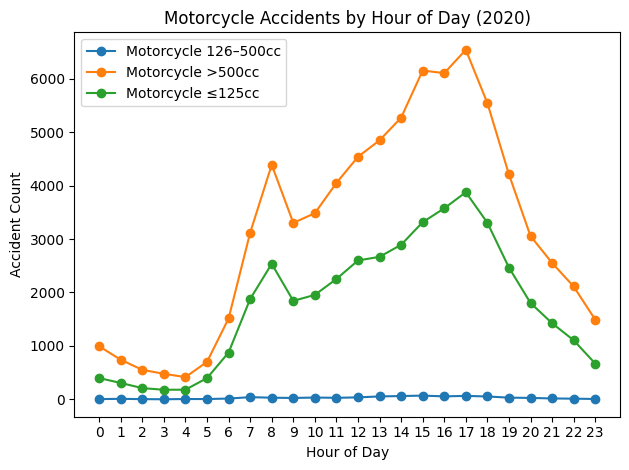

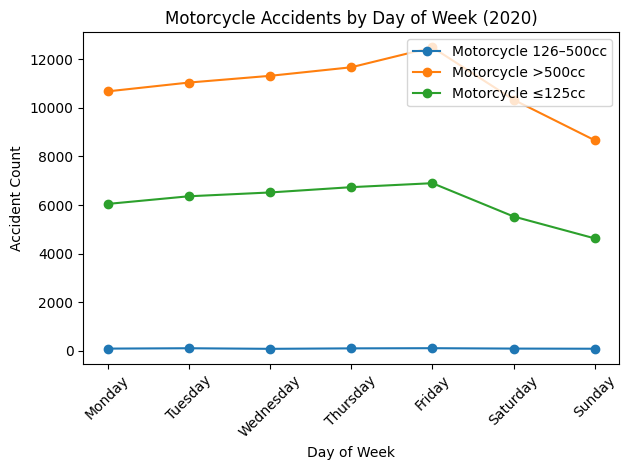

In [15]:
# Plot: Hourly patterns
plt.figure()
for cat in sorted(df_merge['bike_cat'].unique()):
    seq = df_merge[df_merge['bike_cat']==cat]['hour'].value_counts().sort_index()
    plt.plot(seq.index, seq.values, marker='o', label=cat)
plt.title('Motorcycle Accidents by Hour of Day (2020)')
plt.xlabel('Hour of Day')
plt.ylabel('Accident Count')
plt.xticks(range(0,24))
plt.legend()
plt.tight_layout()
plt.show()

# Plot: Weekday patterns
dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure()
for cat in sorted(df_merge['bike_cat'].unique()):
    counts = df_merge[df_merge['bike_cat']==cat]['dow_name'].value_counts().reindex(dow_order)
    plt.plot(dow_order, counts.values, marker='o', label=cat)
plt.title('Motorcycle Accidents by Day of Week (2020)')
plt.xlabel('Day of Week')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Task 3

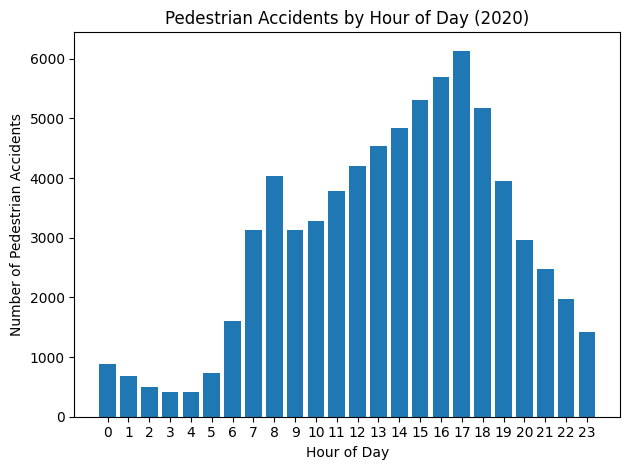

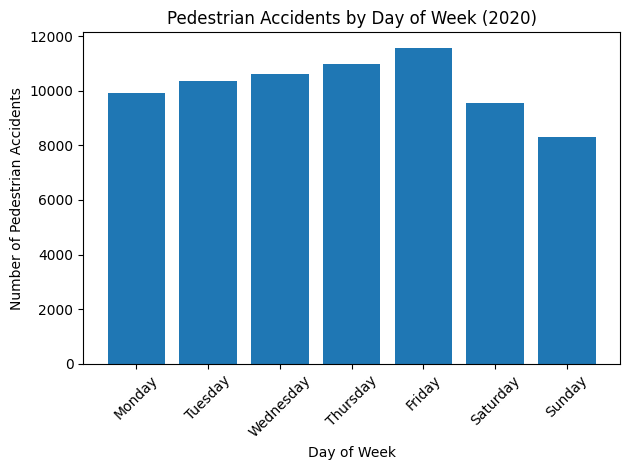

In [17]:
# Filter for pedestrian casualties (class == 1)
df_ped_cas = df_casualty_2020[df_casualty_2020['casualty_class'] == 1]
ped_acc_indices = df_ped_cas[['accident_index']].drop_duplicates()

# Merge to get only pedestrian-involved accidents with their hour & day
df_ped_acc = ped_acc_indices.merge(
    df_acc_2020[['accident_index','hour','day_of_week']],
    on='accident_index',
    how='left'
)

df_ped_acc['day_name'] = df_ped_acc['day_of_week'].map(dow_map)

# 5. Plot: Pedestrian accidents by hour of day
hourly = df_ped_acc['hour'].value_counts().sort_index()
plt.figure()
plt.bar(hourly.index, hourly.values)
plt.title('Pedestrian Accidents by Hour of Day (2020)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pedestrian Accidents')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

# 6. Plot: Pedestrian accidents by day of week
dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dow_counts = df_ped_acc['day_name'].value_counts().reindex(dow_order)
plt.figure()
plt.bar(dow_counts.index, dow_counts.values)
plt.title('Pedestrian Accidents by Day of Week (2020)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pedestrian Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 4

In [24]:
# Association Rule Mining with Apriori
# Start with the numeric codes in df_acc_2020
df_rules = df_acc_2020[[
    'accident_severity',
    'light_conditions',
    'weather_conditions',
    'road_surface_conditions',
    'road_type',
    'urban_or_rural_area'
]].copy()

# Define mapping dictionaries (from STATS20 manual)
light_map = {
    1: 'Daylight',
    4: 'Darkness: street lights present and lit',
    5: 'Darkness: street lights present but unlit',
    6: 'Darkness: no street lighting',
    7: 'Darkness: street lighting unknown'
}

weather_map = {
    1: 'Fine without high winds',
    2: 'Raining without high winds',
    3: 'Snowing without high winds',
    4: 'Fine with high winds',
    5: 'Raining with high winds',
    6: 'Snowing with high winds',
    7: 'Fog or mist – if hazard',
    8: 'Other',
    9: 'Unknown'
}

surface_map = {
    1: 'Dry',
    2: 'Wet/Damp',
    3: 'Snow',
    4: 'Frost/Ice',
    5: 'Flood (surface water over 3cm deep)'
}

road_type_map = {
    1: 'Roundabout',
    2: 'One way street',
    3: 'Dual carriageway',
    6: 'Single carriageway',
    7: 'Slip road',
    9: 'Unknown'
}

urban_rural_map = {
    1: 'Urban',
    2: 'Rural'
}

severity_map = {
    1: 'Fatal',
    2: 'Serious',
    3: 'Slight'
}

df_rules['light']    = df_rules['light_conditions'].map(light_map)
df_rules['weather']  = df_rules['weather_conditions'].map(weather_map)
df_rules['surface']  = df_rules['road_surface_conditions'].map(surface_map)
df_rules['road']     = df_rules['road_type'].map(road_type_map)
df_rules['area']     = df_rules['urban_or_rural_area'].map(urban_rural_map)
df_rules['severity'] = df_rules['accident_severity'].map(severity_map)


# Build transaction DataFrame of only the mapped categorical columns ─────────
df_trans = df_rules[['severity','light','weather','surface','road','area']]
df_trans

,severity,light,weather,surface,road,area
0,Slight,Daylight,Unknown,NaN,Single carriageway,Urban
1,Slight,Daylight,Fine without high winds,Dry,Single carriageway,Urban
2,Slight,Darkness: street lights present and lit,Fine without high winds,Wet/Damp,Single carriageway,Urban
3,Serious,Darkness: street lights present and lit,Fine without high winds,Dry,Single carriageway,Urban
4,Slight,Darkness: street lights present and lit,Fine without high winds,Dry,Single carriageway,Urban
...,...,...,...,...,...,...
91194,Serious,Daylight,Fine without high winds,Dry,Single carriageway,Urban
91195,Slight,Daylight,Fine without high winds,Dry,Unknown,Urban
91196,Serious,Daylight,Fine without high winds,Dry,Single carriageway,Rural
91197,Slight,Daylight,Fine without high winds,Dry,Single carriageway,Urban


In [26]:
# Run the Apriori algorithm 
# One‐hot encode to 0/1 indicators
df_dummies = pd.get_dummies(df_trans, prefix_sep='=')


# Convert to boolean matrix for mlxtend Apriori
df_bool = df_dummies.astype(bool)


# Run Apriori to find frequent itemsets (min_support = 1%)
frequent_itemsets = apriori(
    df_bool,
    min_support=0.01,
    use_colnames=True
)


# Generate association rules (filter lift ≥ 1.2)
rules = association_rules(
    frequent_itemsets,
    metric='lift',
    min_threshold=1.2
)


# Filter for rules predicting high‐severity outcomes
def is_high_sev(consequents):
    return any(
        'severity=Fatal' in str(item) or 'severity=Serious' in str(item)
        for item in consequents
    )

rules_severe = rules[rules['consequents'].apply(is_high_sev)] \
                  .sort_values(by='lift', ascending=False)


# Display the top 10 rules
output_cols = ['antecedents','consequents','support','confidence','lift']
rules_severe[output_cols].head(10)

,antecedents,consequents,support,confidence,lift
1325,"(road=Single carriageway, weather=Raining with...","(surface=Wet/Damp, severity=Serious, area=Urban)",0.010801,0.119961,3.676185
1324,"(surface=Wet/Damp, road=Single carriageway)","(weather=Raining without high winds, severity=...",0.010801,0.051291,3.587212
438,"(surface=Wet/Damp, road=Single carriageway)","(weather=Raining without high winds, severity=...",0.017676,0.083941,3.524549
1316,"(surface=Wet/Damp, road=Single carriageway, ar...","(weather=Raining without high winds, severity=...",0.010801,0.081824,3.435676
66,(surface=Wet/Damp),"(weather=Raining without high winds, severity=...",0.023038,0.080069,3.361959
442,(surface=Wet/Damp),"(weather=Raining without high winds, road=Sing...",0.017676,0.061433,3.356873
440,"(weather=Raining without high winds, road=Sing...","(surface=Wet/Damp, severity=Serious)",0.017676,0.196322,3.356021
450,(surface=Wet/Damp),"(weather=Raining without high winds, severity=...",0.013805,0.047980,3.355632
378,(surface=Wet/Damp),"(weather=Raining without high winds, light=Day...",0.011612,0.040358,3.355178
1326,(surface=Wet/Damp),"(road=Single carriageway, severity=Serious, we...",0.010801,0.037538,3.349744


### Task 5

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

# Connect and load the LSOA lookup table
conn = sqlite3.connect('accident_data_v1.0.0_2023.db')
lsoa_df = pd.read_sql_query("""
    SELECT lsoa01cd AS lsoa_code,
           lsoa01nm AS lsoa_name
    FROM lsoa;
""", conn)

# Identify the LSOAs in each region by name‑matching
hull_lsoas       = lsoa_df[lsoa_df['lsoa_name'].str.contains('Kingston upon Hull', case=False)]['lsoa_code']
humberside_lsoas = lsoa_df[lsoa_df['lsoa_name'].str.contains('Humberside', case=False)]['lsoa_code']
ery_lsoas        = lsoa_df[lsoa_df['lsoa_name'].str.contains('East Riding', case=False)]['lsoa_code']

regions = {
    'Hull':       hull_lsoas.tolist(),
    'Humberside': humberside_lsoas.tolist(),
    'East_Riding': ery_lsoas.tolist()
}

In [39]:
# 3) Load 2020 accident data with coordinates and LSOA
df_acc_2020 = pd.read_sql_query("""
    SELECT accident_index,
           longitude,
           latitude,
           lsoa_of_accident_location
    FROM accident
    WHERE accident_year = 2020
      AND longitude IS NOT NULL
      AND latitude  IS NOT NULL;
""", conn)

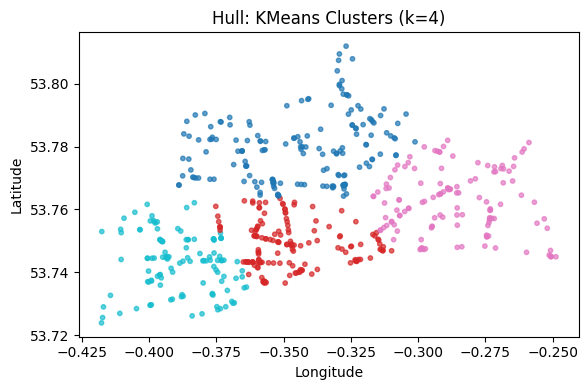

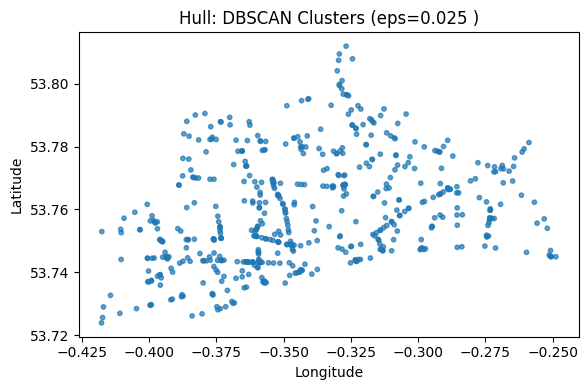

Hull KMeans cluster sizes:
kmeans_cluster
0    170
1    153
2    126
3    120
Name: count, dtype: int64

Hull DBSCAN cluster sizes:
dbscan_cluster
-1    569
Name: count, dtype: int64

No accidents found for Humberside


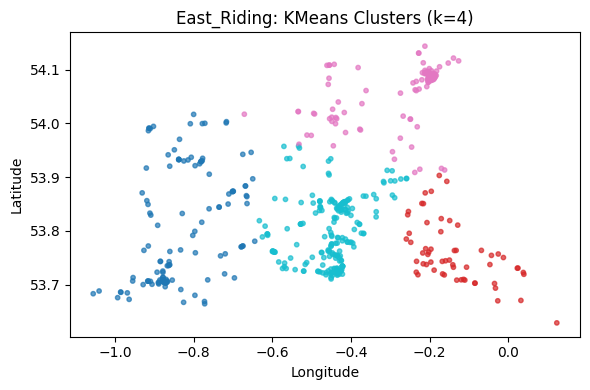

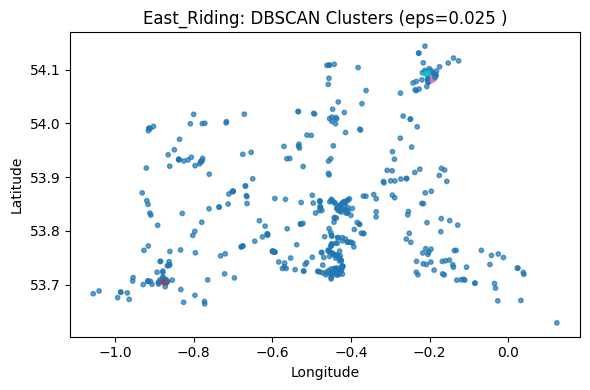

East_Riding KMeans cluster sizes:
kmeans_cluster
0    127
1     58
2    102
3    201
Name: count, dtype: int64

East_Riding DBSCAN cluster sizes:
dbscan_cluster
-1    458
 0     10
 1     10
 2     10
Name: count, dtype: int64



In [46]:
# For each region: filter by LSOA, cluster, and plot
for region_name, lsoas in regions.items():
    df_reg = df_acc_2020[df_acc_2020['lsoa_of_accident_location'].isin(lsoas)].copy()
    coords = df_reg[['longitude', 'latitude']]

    # Skip if no data
    if df_reg.empty:
        print(f"No accidents found for {region_name}")
        continue

    # Standardize
    X_scaled = StandardScaler().fit_transform(coords)

    # KMeans (k=4)
    kmeans = KMeans(n_clusters=4, random_state=42)
    df_reg['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

    # DBSCAN (eps=0.025 , min_samples=10)
    dbscan = DBSCAN(eps=0.025, min_samples=10)
    df_reg['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

    # Plot KMeans
    plt.figure(figsize=(6,4))
    plt.scatter(df_reg['longitude'], df_reg['latitude'],
                c=df_reg['kmeans_cluster'], cmap='tab10', s=10, alpha=0.7)
    plt.title(f"{region_name}: KMeans Clusters (k=4)")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()

    # Plot DBSCAN
    plt.figure(figsize=(6,4))
    plt.scatter(df_reg['longitude'], df_reg['latitude'],
                c=df_reg['dbscan_cluster'], cmap='tab10', s=10, alpha=0.7)
    plt.title(f"{region_name}: DBSCAN Clusters (eps=0.025 )")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()

    # Print cluster counts
    print(f"{region_name} KMeans cluster sizes:\n{df_reg['kmeans_cluster'].value_counts().sort_index()}\n")
    print(f"{region_name} DBSCAN cluster sizes:\n{df_reg['dbscan_cluster'].value_counts().sort_index()}\n")

### Task 6

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Load data for 2017–2019
df = pd.read_sql_query("""
    SELECT date, police_force
    FROM accident
    WHERE accident_year BETWEEN 2017 AND 2019;
""", conn)

# Parse and clean dates
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['date'])

# Select top 3 police forces by accident count
top3_forces = df['police_force'].value_counts().nlargest(3).index.tolist()

C:\Users\Ojei Victory\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


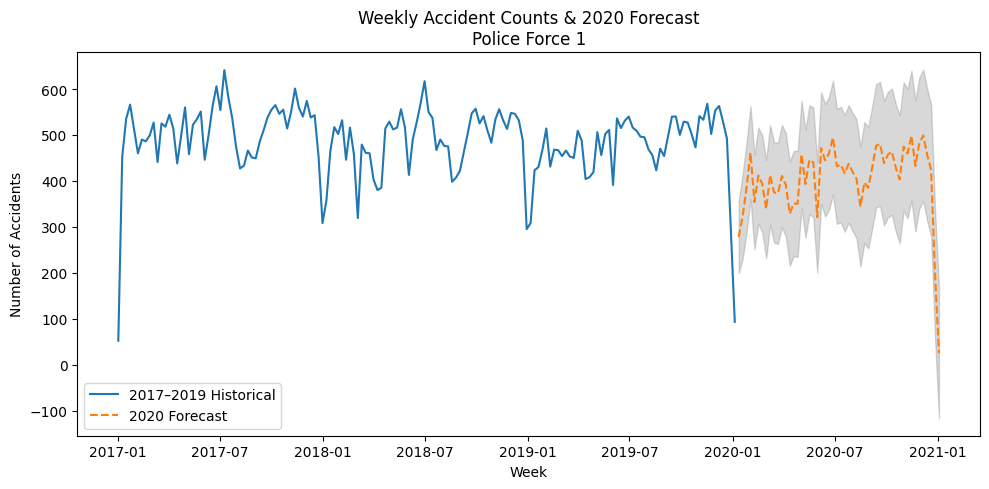

C:\Users\Ojei Victory\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


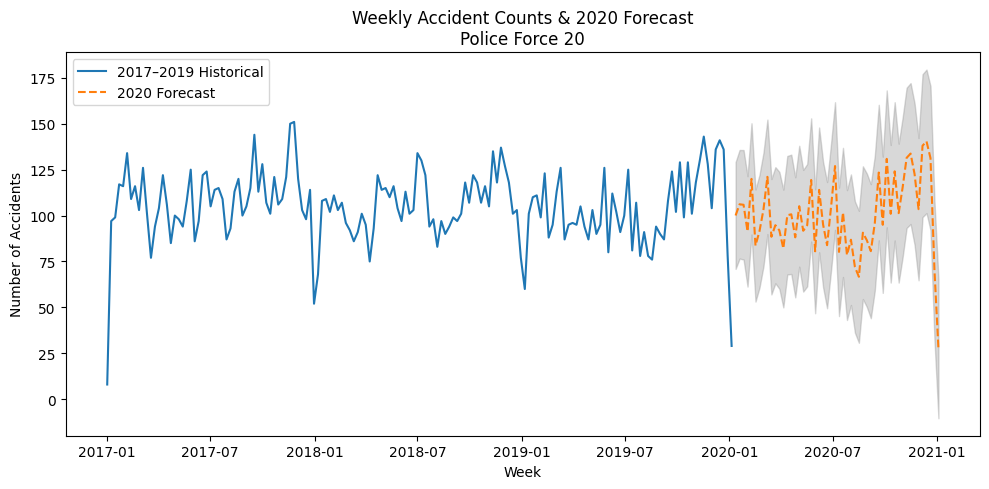

C:\Users\Ojei Victory\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


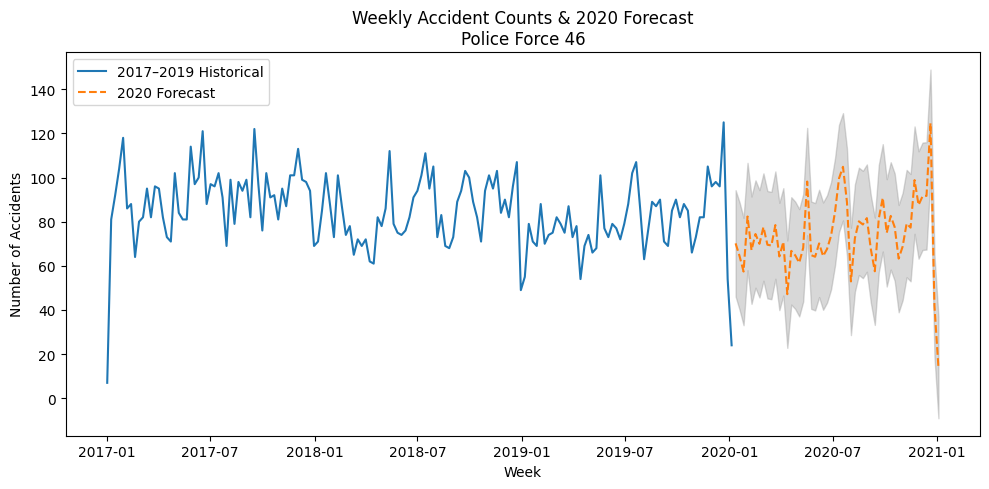

In [49]:
# For each force: aggregate, fit SARIMA, forecast, and plot
for pf in top3_forces:
    # Filter and aggregate weekly counts
    df_pf = df[df['police_force'] == pf]
    weekly_counts = (
        df_pf
        .set_index('date')
        .resample('W')['police_force']
        .count()
        .asfreq('W')
        .fillna(0)
    )
    
    # Fit SARIMA(1,1,1)(1,1,1,52)
    model = SARIMAX(
        weekly_counts,
        order=(1,1,1),
        seasonal_order=(1,1,1,52),
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    result = model.fit(disp=False)
    
    # Forecast next 52 weeks
    forecast_obj = result.get_forecast(steps=52)
    forecast = forecast_obj.predicted_mean
    ci = forecast_obj.conf_int()
    
    # Plot historical & forecast
    plt.figure(figsize=(10,5))
    plt.plot(weekly_counts, label='2017–2019 Historical')
    plt.plot(forecast, '--', label='2020 Forecast')
    plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)
    plt.title(f'Weekly Accident Counts & 2020 Forecast\nPolice Force {pf}')
    plt.xlabel('Week')
    plt.ylabel('Number of Accidents')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Task 7

In [50]:
# Connect and load LSOA lookup
conn = sqlite3.connect('accident_data_v1.0.0_2023.db')
lsoa_df = pd.read_sql_query("""
    SELECT lsoa01cd AS lsoa_code,
           lsoa01nm AS lsoa_name
    FROM lsoa;
""", conn)

# Identify Hull LSOAs by name
hull_lsoas = lsoa_df[
    lsoa_df['lsoa_name'].str.contains('Kingston upon Hull', case=False)
]['lsoa_code'].tolist()

# Load 2020 accident data for Hull LSOAs
df_acc_2020 = pd.read_sql_query(f"""
    SELECT date,
           lsoa_of_accident_location AS lsoa
    FROM accident
    WHERE accident_year = 2020
      AND lsoa_of_accident_location IN ({','.join(['?']*len(hull_lsoas))})
""", conn, params=hull_lsoas)

In [51]:
# Parse dates
df_acc_2020['date'] = pd.to_datetime(df_acc_2020['date'], dayfirst=True, errors='coerce')
df_acc_2020 = df_acc_2020.dropna(subset=['date'])

# 3) Identify top 3 LSOAs by Jan–Mar counts
mask_q1 = (df_acc_2020['date'] >= '2020-01-01') & (df_acc_2020['date'] <= '2020-03-31')
top3 = (
    df_acc_2020[mask_q1]
    .groupby('lsoa')['date']
    .count()
    .nlargest(3)
    .index
    .tolist()
)

print("Top 3 Hull LSOAs (Q1 2020):", top3)

Top 3 Hull LSOAs (Q1 2020): ['E01012817', 'E01012848', 'E01012889']


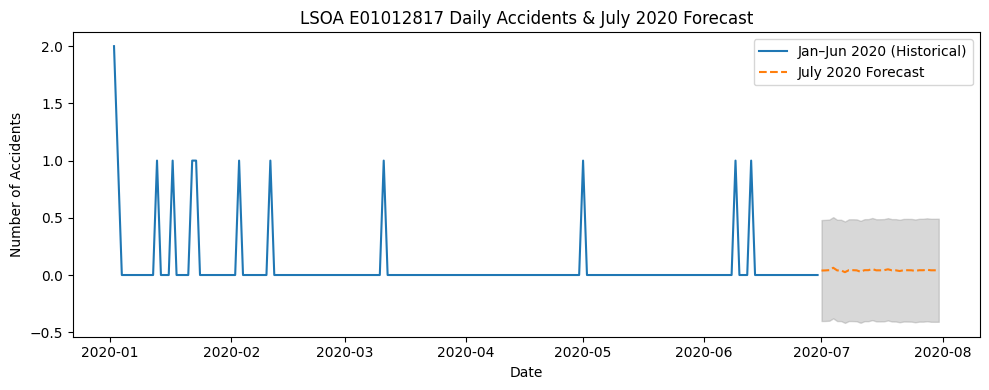

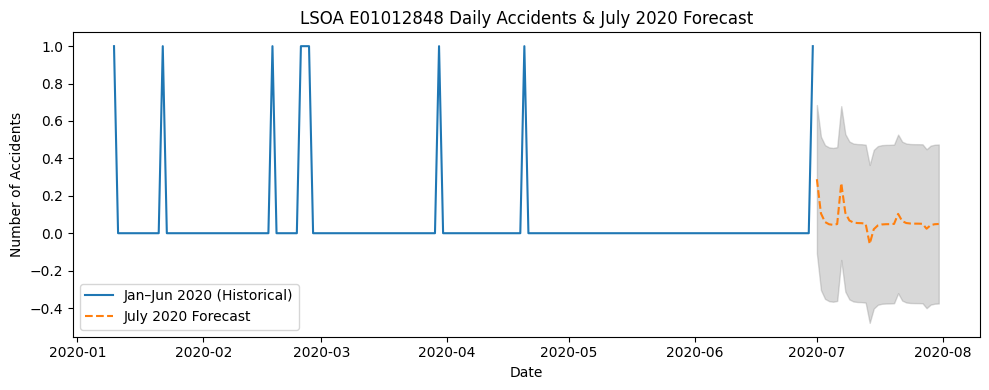

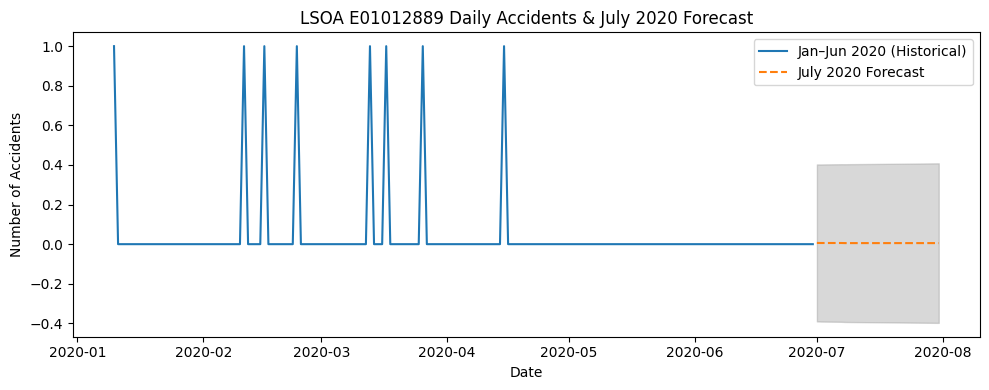

In [52]:
# For each top LSOA: build daily series Jan–Jun, fit SARIMA, forecast July
for lsoa in top3:
    df_l = df_acc_2020[df_acc_2020['lsoa'] == lsoa]
    
    # Daily counts from Jan 1 to Jun 30
    daily = (
        df_l.set_index('date')['lsoa']
        .resample('D').count()
        .asfreq('D').fillna(0)
    )['2020-01-01':'2020-06-30']
    
    # Fit SARIMA(1,1,1)(1,0,1,7) to capture weekly seasonality
    model = SARIMAX(
        daily,
        order=(1,1,1),
        seasonal_order=(1,0,1,7),
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    res = model.fit(disp=False)
    
    # Forecast July 2020 (31 days)
    forecast = res.get_forecast(steps=31)
    fc_mean = forecast.predicted_mean
    fc_ci = forecast.conf_int()
    fc_index = pd.date_range(start='2020-07-01', periods=31, freq='D')
    fc_mean.index = fc_index
    fc_ci.index = fc_index
    
    # Plot historical & forecast
    plt.figure(figsize=(10,4))
    plt.plot(daily, label='Jan–Jun 2020 (Historical)')
    plt.plot(fc_mean, '--', label='July 2020 Forecast')
    plt.fill_between(fc_ci.index,
                     fc_ci.iloc[:,0],
                     fc_ci.iloc[:,1],
                     color='gray', alpha=0.3)
    plt.title(f'LSOA {lsoa} Daily Accidents & July 2020 Forecast')
    plt.xlabel('Date')
    plt.ylabel('Number of Accidents')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Task 8

Number of nodes: 4039
Number of edges: 88234
Network density: 0.010819963503439287
Average degree: 43.69101262688784


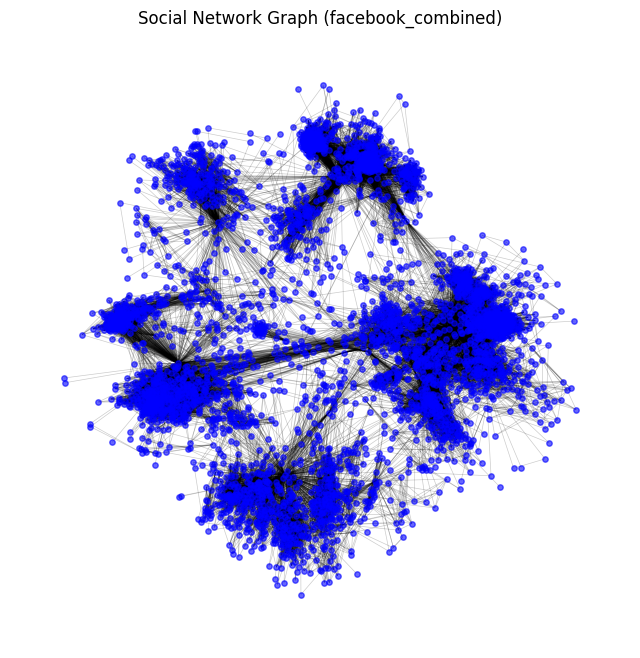

In [53]:
import networkx as nx
 
G = nx.read_edgelist('facebook_combined.txt', nodetype=int)

n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
density = nx.density(G)
avg_degree = sum(dict(G.degree()).values()) / n_nodes

print("Number of nodes:", n_nodes)
print("Number of edges:", n_edges)
print("Network density:", density)
print("Average degree:", avg_degree)

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42, k=0.1)
nx.draw_networkx_nodes(G, pos, node_size=15, node_color='blue', alpha=0.6)
nx.draw_networkx_edges(G, pos, alpha=0.2, width=0.5)
plt.title("Social Network Graph (facebook_combined)")
plt.axis('off')
plt.show()

### Task 9

Edge Betweenness Centrality:
  Min: 0.000000
  Max: 0.171493
  Mean: 0.000042
  Median: 0.000001


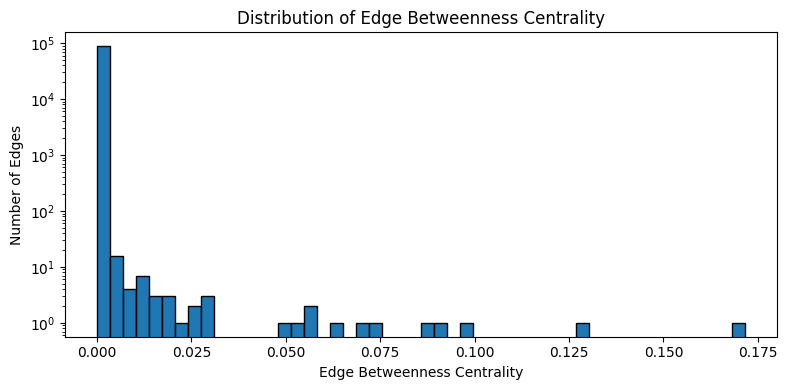

In [56]:
# Compute edge betweenness centrality
edge_bc = nx.edge_betweenness_centrality(G, k=None, seed=42)

# Extract centrality values
bc_values = list(edge_bc.values())

# Summary statistics
print("Edge Betweenness Centrality:")
print(f"  Min: {min(bc_values):.6f}")
print(f"  Max: {max(bc_values):.6f}")
print(f"  Mean: {sum(bc_values)/len(bc_values):.6f}")
print(f"  Median: {sorted(bc_values)[len(bc_values)//2]:.6f}")

# Plot distribution (histogram)
plt.figure(figsize=(8,4))
plt.hist(bc_values, bins=50, edgecolor='black')
plt.title('Distribution of Edge Betweenness Centrality')
plt.xlabel('Edge Betweenness Centrality')
plt.ylabel('Number of Edges')
plt.yscale('log')  # log scale to show long tail
plt.tight_layout()
plt.show()

### Task 10

In [59]:
from networkx.algorithms import community

# Community detection methods

# A) Greedy Modularity Maximization
greedy_communities = list(community.greedy_modularity_communities(G))

# B) Asynchronous Label Propagation
lp_communities = list(community.asyn_lpa_communities(G))

# Compare results

# Greedy Modularity
greedy_sizes = sorted([len(c) for c in greedy_communities], reverse=True)
print("Greedy Modularity:")
print("  Number of communities:", len(greedy_communities))
print("  Top 5 community sizes:", greedy_sizes[:5])

# Label Propagation
lp_sizes = sorted([len(c) for c in lp_communities], reverse=True)
print("\nLabel Propagation:")
print("  Number of communities:", len(lp_communities))
print("  Top 5 community sizes:", lp_sizes[:5])

Greedy Modularity:
  Number of communities: 13
  Top 5 community sizes: [983, 815, 548, 543, 372]

Label Propagation:
  Number of communities: 76
  Top 5 community sizes: [479, 475, 341, 285, 237]


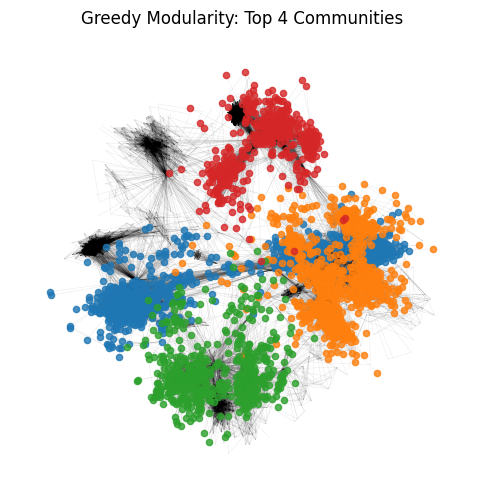

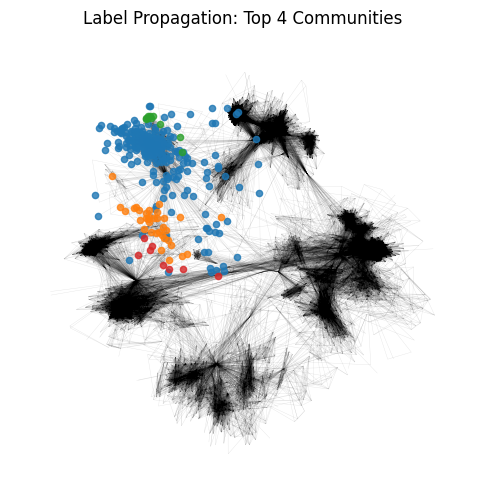

In [60]:
# 4) Visualize top 4 communities for each method

def draw_top(comms, title, top_n=4):
    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(G, seed=42, k=0.1)
    colors = plt.cm.tab10(range(top_n))
    for i, comm in enumerate(comms[:top_n]):
        nx.draw_networkx_nodes(
            G, pos,
            nodelist=list(comm),
            node_size=20,
            node_color=[colors[i]],
            alpha=0.8,
            label=f'Cluster {i}'
        )
    nx.draw_networkx_edges(G, pos, alpha=0.1, width=0.3)
    plt.title(title)
    plt.axis('off')
    plt.show()

draw_top(greedy_communities, "Greedy Modularity: Top 4 Communities")
draw_top(lp_communities, "Label Propagation: Top 4 Communities")